# CUSTOMER CATEGORY ANALYSIS

Objective: To categorize the different types of customers that visits a retail store. To draw insights on which customers are most valuable to the retail store so that customer satisfaction remains the main priority for the retail store.

Data contains different transactional information of different customers from different countries. it contains information about their date of purchase,  money spent on eacfh purchase and the number of times they have visited the store.

We are going to use the RFM Modelling to categorize our Customer base and predict our Customer value for the retail store by the help of KMeans Clustering and finally for validation we will calculate the silhouette score for the compactness of the clusters formed and how the objects are well matching to its very own clusters. 

RFM stands for Recency Frequency and Monetary Value:

Recency: Time difference between now to transaction date.

Frequency: Total number of transactions done by customer in the timeline.

Monetary Value: Total Money spent by the Customer.

# 1. Loading Libraries

In [1]:
#Importing the essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# 2. Loading and Describing the Data 

In [2]:
df=pd.read_excel("Online Retail.xlsx")

In [3]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.shape

(541909, 8)

# 3. Treating the missing values

In [6]:
df.isna().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [7]:
#To get the record of the "Credit" Transactions of the customers
df[df.InvoiceNo.map(lambda x: str(x)[0]=="C")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom


This is the transaction details of the customers who have purchased goods in "Credit" from the retail store. The Quantity in negative numbers also indicates the same. We have 9288 such "Credit" transaction details of the customers.These customers are not generating any direct revenue for our store.

In [8]:
#Calculating the total number of null values for Decription and Customer ID Coulmns
Des_Null=df.Description.isnull().sum()
print("Description Column Null Values -",Des_Null)
Cust_Null=df.CustomerID.isnull().sum()
print("CustomerID Column Null Values -",Cust_Null)

Description Column Null Values - 1454
CustomerID Column Null Values - 135080


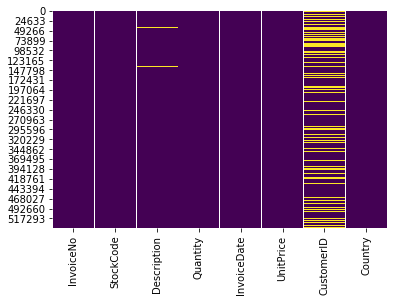

In [9]:
#Visualizing the null values in heatmap
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')

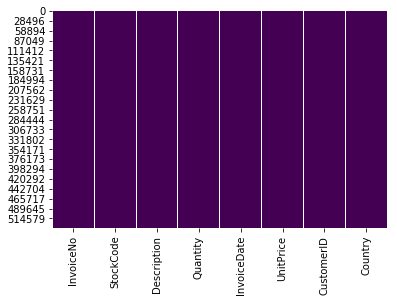

In [10]:
#Cleaning the data by treating the null values
df=df.dropna(subset=['CustomerID'])
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')

In [11]:
#Removing the credit data as these customers are not generating any direct revenue for our store
df=df[df.InvoiceNo.map(lambda x: str(x)[0]!="C")]

# 4. Exploratory Data Analysis

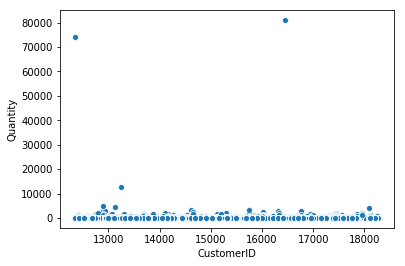

In [12]:
sns.scatterplot(x = "CustomerID", y = "Quantity", data = df)

The above scatterplot gives us an idea about number of quantities of goods that are purchased by our customers in the timeline. Mostly our customers have purchased below 10000 quantites. Some exceptional cases are also present.

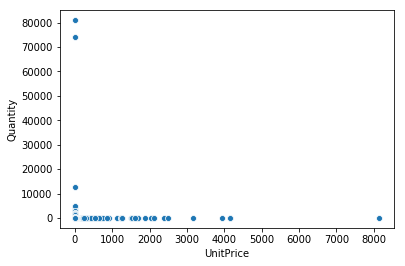

In [13]:
sns.scatterplot(x = "UnitPrice", y = "Quantity", data = df)

The above scatterplot gives us an idea about number of most purchased price range of goods with respect to quantities by our customers in the timeline.Mostly the customers have bought the goods whose prices range is below $2500 and below 10000 quantities. Some exceptional cases are also present.

In [14]:
df.shape

(397924, 8)

In [15]:
#Converting the datatype of customer id to integer from string
df.CustomerID=df.CustomerID.map(lambda x: str(int(x)))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      397924 non-null object
StockCode      397924 non-null object
Description    397924 non-null object
Quantity       397924 non-null int64
InvoiceDate    397924 non-null datetime64[ns]
UnitPrice      397924 non-null float64
CustomerID     397924 non-null object
Country        397924 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.3+ MB


# 5. Feature Engineering

# (a) Process for Calculating the Recency of the Customers

In [16]:
#Understanding the Column InvoiceDate
print(df.InvoiceDate[100])
print(df.InvoiceDate[0])
print(df.InvoiceDate[397924])

2010-12-01 09:37:00
2010-12-01 08:26:00
2011-10-14 12:56:00


In [17]:
df.InvoiceDate[397924]

Timestamp('2011-10-14 12:56:00')

In [18]:
df.InvoiceDate[100]-df.InvoiceDate[0]

Timedelta('0 days 01:11:00')

In [19]:
df.InvoiceDate[397924]-df.InvoiceDate[0]

Timedelta('317 days 04:30:00')

In [20]:
df.InvoiceDate.max()

Timestamp('2011-12-09 12:50:00')

In [21]:
df.InvoiceDate.max()-df.InvoiceDate[0]

Timedelta('373 days 04:24:00')

In [22]:
last_transaction_date=df.InvoiceDate.max()

In [23]:
#Creating new column storing time difference between current time and invoice time
df["TimeDiff"]=df.InvoiceDate.map(lambda x:\
                                 (last_transaction_date-x).days)

In [24]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TimeDiff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,373
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,373
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,373
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,373
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,373


In [25]:
df.groupby(['CustomerID','TimeDiff'])['CustomerID'].count()

CustomerID  TimeDiff
12346       325           1
12347       1            11
            39           47
            129          22
            182          18
            246          24
            316          29
            366          31
12348       74            3
            248           5
            318           6
            357          17
12349       18           73
12350       309          17
12352       35           15
            71           14
            79           18
            261           8
            266           7
            282           8
            296          15
12353       203           4
12354       231          58
12355       213          13
12356       22            2
            245          21
            325          36
12357       32          131
12358       1             7
            150          12
                       ... 
18272       224          22
            246          33
18273       1             1
            95            1

In [26]:
#Creating the Column Recency
recency=df.groupby('CustomerID').\
agg({'TimeDiff': lambda x:min(x)})
print(recency)

            TimeDiff
CustomerID          
12346            325
12347              1
12348             74
12349             18
12350            309
12352             35
12353            203
12354            231
12355            213
12356             22
12357             32
12358              1
12359             57
12360             51
12361            286
12362              2
12363            109
12364              7
12365            290
12367              3
12370             50
12371             44
12372             71
12373            310
12374             24
12375             10
12377            314
12378            129
12379             81
12380             21
...              ...
18242             71
18245              6
18246             23
18248            122
18249             16
18250            309
18251             86
18252             50
18255             88
18257             38
18259             24
18260            172
18261             42
18262            139
18263        

# (b) Process for Calculating the Frequency of the Customers

In [27]:
df.groupby(['CustomerID','InvoiceNo'])['InvoiceNo'].count()

CustomerID  InvoiceNo
12346       541431         1
12347       537626        31
            542237        29
            549222        24
            556201        18
            562032        22
            573511        47
            581180        11
12348       539318        17
            541998         6
            548955         5
            568172         3
12349       577609        73
12350       543037        17
12352       544156        15
            545323         5
            545332         3
            546869         7
            547390         8
            567505        18
            568699        14
            574275        15
12353       553900         4
12354       550911        58
12355       552449        13
12356       541430        36
            549435        21
            576895         2
12357       574740       131
12358       559707        12
                        ... 
18273       547843         1
            565480         1
            581136   

In [28]:
#Creating the Column Frequency
frequency=df.groupby('CustomerID').\
agg({'InvoiceNo':lambda x: len(set(x))})
print(frequency)

            InvoiceNo
CustomerID           
12346               1
12347               7
12348               4
12349               1
12350               1
12352               8
12353               1
12354               1
12355               1
12356               3
12357               1
12358               2
12359               4
12360               3
12361               1
12362              10
12363               2
12364               4
12365               2
12367               1
12370               4
12371               2
12372               3
12373               1
12374               1
12375               2
12377               2
12378               1
12379               2
12380               4
...               ...
18242               4
18245               7
18246               2
18248               2
18249               1
18250               1
18251               1
18252               2
18255               1
18257               8
18259               3
18260               6
18261     

# (c) Process for Calculating the Monetary Value of the Customers

In [29]:
#Calculating the Total Amount per record
df['TotalAmount']=df.UnitPrice*df.Quantity
df.TotalAmount

0          15.30
1          20.34
2          22.00
3          20.34
4          20.34
5          15.30
6          25.50
7          11.10
8          11.10
9          54.08
10         12.60
11         12.60
12         30.00
13          9.90
14         25.50
15         14.85
16         19.90
17         17.85
18         17.85
19         31.80
20         31.80
21         25.50
22         14.85
23         14.85
24         14.85
25         17.85
26         90.00
27         90.00
28         45.00
29         10.20
           ...  
541879     30.00
541880     15.00
541881      8.50
541882     10.08
541883     10.50
541884     15.00
541885     10.20
541886      4.68
541887     15.00
541888     11.40
541889     23.40
541890     23.60
541891     30.00
541892    214.80
541893     70.80
541894     23.40
541895     19.80
541896     19.80
541897     15.00
541898     15.00
541899     15.00
541900     15.00
541901     15.60
541902     23.40
541903     16.60
541904     10.20
541905     12.60
541906     16.

In [30]:
#Creating the Column Monetary Value
monetary=df.groupby('CustomerID').\
agg({'TotalAmount': lambda x: sum(x)})
print(monetary)

            TotalAmount
CustomerID             
12346          77183.60
12347           4310.00
12348           1797.24
12349           1757.55
12350            334.40
12352           2506.04
12353             89.00
12354           1079.40
12355            459.40
12356           2811.43
12357           6207.67
12358           1168.06
12359           6372.58
12360           2662.06
12361            189.90
12362           5226.23
12363            552.00
12364           1313.10
12365            641.38
12367            168.90
12370           3545.69
12371           1887.96
12372           1298.04
12373            364.60
12374            742.93
12375            457.50
12377           1628.12
12378           4008.62
12379            852.24
12380           2724.81
...                 ...
18242           2232.49
18245           2567.06
18246            596.10
18248            804.02
18249             95.34
18250            349.27
18251           4314.72
18252            526.67
18255           

# (d) Creating a new data set including RFM

In [31]:
#Creating a new data-set by keeping the Customer ID, Recency, Frequency and its Monetary Value
rfm=recency.join(frequency).join(monetary)

In [32]:
rfm=rfm.rename(columns={'TimeDiff':'Recency',\
                   'InvoiceNo':'Frequency',\
                   'TotalAmount':'Monetary_Value'})

In [33]:
rfm.to_csv('rfm.csv')

In [34]:
df=pd.read_csv("rfm.csv")
df.head(5)

,CustomerID,Recency,Frequency,Monetary_Value
0,12346,325,1,77183.60
1,12347,1,7,4310.00
2,12348,74,4,1797.24
3,12349,18,1,1757.55
4,12350,309,1,334.40


For Business point of view,we will standardize the RFM in same scale by introducing a score for each metric.

For Monetary Value and Frequency we are going to convert it into 1-5 Rating system, 5 being best.

For Recency will be 1 being the best in 1-5 Rating system.

20% of Customers are having Recency of 12.600000000000023 days
40% of Customers are having Recency of 32.0 days
60% of Customers are having Recency of 71.0 days
80% of Customers are having Recency of 178.0 days


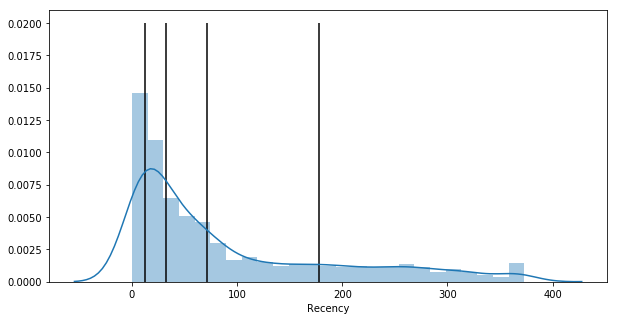

In [35]:
print("20% of Customers are having Recency of",df.Recency.quantile(0.2),"days")
print("40% of Customers are having Recency of",df.Recency.quantile(0.4),"days")
print("60% of Customers are having Recency of",df.Recency.quantile(0.6),"days")
print("80% of Customers are having Recency of",df.Recency.quantile(0.8),"days")

#Plotting Vertical Lines
plt.figure(figsize=(10,5))
sns.distplot(df.Recency)
plt.vlines(df.Recency.quantile(0.2),ymin=0,ymax=0.02)
plt.vlines(df.Recency.quantile(0.4),ymin=0,ymax=0.02)
plt.vlines(df.Recency.quantile(0.6),ymin=0,ymax=0.02)
plt.vlines(df.Recency.quantile(0.8),ymin=0,ymax=0.02)

20% of Customers are having Frequency of 1.0
40% of Customers are having Frequency of 2.0
60% of Customers are having Frequency of 3.0
80% of Customers are having Frequency of 6.0


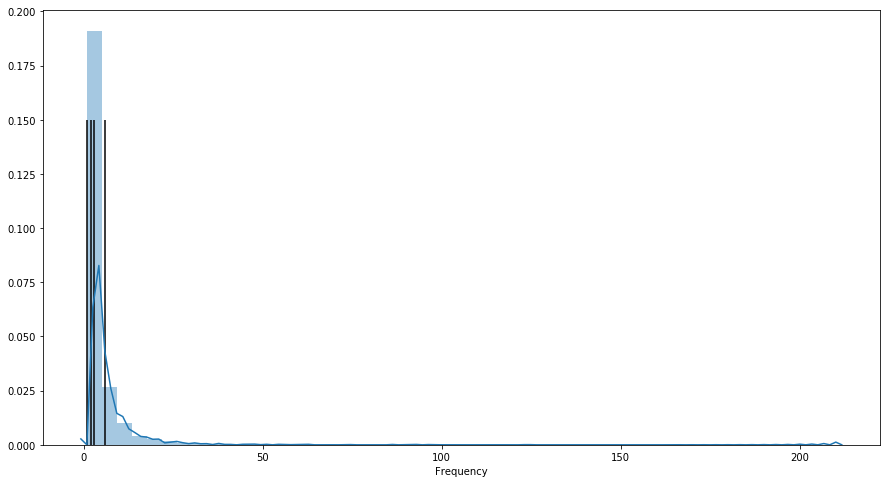

In [36]:
print("20% of Customers are having Frequency of",df.Frequency.quantile(0.2))
print("40% of Customers are having Frequency of",df.Frequency.quantile(0.4))
print("60% of Customers are having Frequency of",df.Frequency.quantile(0.6))
print("80% of Customers are having Frequency of",df.Frequency.quantile(0.8))

#Plotting Vertical Lines
plt.figure(figsize=(15,8))
sns.distplot(df.Frequency)
plt.vlines(df.Frequency.quantile(0.2),ymin=0,ymax=0.15)
plt.vlines(df.Frequency.quantile(0.4),ymin=0,ymax=0.15)
plt.vlines(df.Frequency.quantile(0.6),ymin=0,ymax=0.15)
plt.vlines(df.Frequency.quantile(0.8),ymin=0,ymax=0.15)

20% of Customers are having Monetary Value of $ 250.106
40% of Customers are having Monetary Value of $ 489.72400000000005
60% of Customers are having Monetary Value of $ 941.9419999999993
80% of Customers are having Monetary Value of $ 2057.9139999999998


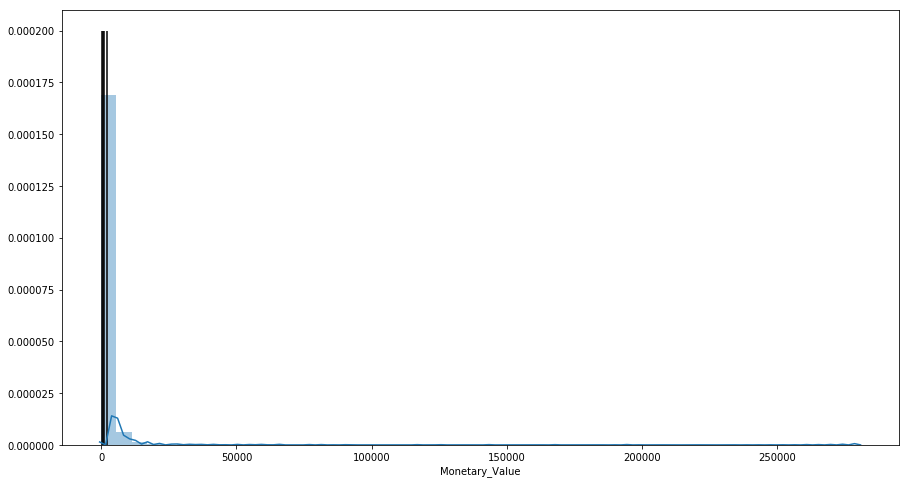

In [37]:
print("20% of Customers are having Monetary Value of $",df.Monetary_Value.quantile(0.2))
print("40% of Customers are having Monetary Value of $",df.Monetary_Value.quantile(0.4))
print("60% of Customers are having Monetary Value of $",df.Monetary_Value.quantile(0.6))
print("80% of Customers are having Monetary Value of $",df.Monetary_Value.quantile(0.8))

#Plotting Vertical Lines
plt.figure(figsize=(15,8))
sns.distplot(df.Monetary_Value)
plt.vlines(df.Monetary_Value.quantile(0.2),ymin=0,ymax=0.0002)
plt.vlines(df.Monetary_Value.quantile(0.4),ymin=0,ymax=0.0002)
plt.vlines(df.Monetary_Value.quantile(0.6),ymin=0,ymax=0.0002)
plt.vlines(df.Monetary_Value.quantile(0.8),ymin=0,ymax=0.0002)

In [38]:
#Defining the rating system for RFM
def transform_rating(x,series,upward=True):
    q1=series.quantile(0.2)
    q2=series.quantile(0.4)
    q3=series.quantile(0.6)
    q4=series.quantile(0.8)
    if upward: #Frequency and Monetary
        if x<=q1:
            return 1
        elif x<=q2:
            return 2
        elif x<=q3:
            return 3
        elif x<=q4:
            return 4
        else:
            return 5
    else:     #Recency
        if x<=q1:
            return 5
        elif x<=q2:
            return 4
        elif x<=q3:
            return 3
        elif x<=q4:
            return 2
        else:
            return 1

In [39]:
df['Recency_Score']=df.Recency.map(lambda x:\
                                  transform_rating(x,df.Recency,upward=False))
df['Monetary_Score']=df.Monetary_Value.map(lambda x:\
                                  transform_rating(x,df.Monetary_Value,upward=True))
df['Frequency_Score']=df.Frequency.map(lambda x:\
                                  transform_rating(x,df.Frequency,upward=True))

In [40]:
df.head(10)

,CustomerID,Recency,Frequency,Monetary_Value,Recency_Score,Monetary_Score,Frequency_Score
0,12346,325,1,77183.60,1,5,1
1,12347,1,7,4310.00,5,5,5
2,12348,74,4,1797.24,2,4,4
3,12349,18,1,1757.55,4,4,1
4,12350,309,1,334.40,1,2,1
5,12352,35,8,2506.04,3,5,5
6,12353,203,1,89.00,1,1,1
7,12354,231,1,1079.40,1,4,1
8,12355,213,1,459.40,1,2,1
9,12356,22,3,2811.43,4,5,3


In [41]:
#Defining the variables to be fitted into Cluster Analysis 
X=df[['Recency_Score','Monetary_Score','Frequency_Score']]

# 6. Cluster Analysis -  K-Means Clustering

In [42]:
model=KMeans(n_clusters=4,random_state=22)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=22, tol=0.0001, verbose=0)

In [43]:
df['Customer_Category']=model.predict(X)

In [44]:
print(X.columns.values)
print(model.cluster_centers_)

['Recency_Score' 'Monetary_Score' 'Frequency_Score']
[[4.39161392 4.4778481  4.47705696]
 [3.81930415 1.88327722 1.47362514]
 [2.51956947 3.60273973 2.93737769]
 [1.33907057 1.71858864 1.22375215]]


In [45]:
df.groupby(['Customer_Category'])['Customer_Category'].count()

Customer_Category
0    1264
1     891
2    1022
3    1162
Name: Customer_Category, dtype: int64

We have predicted the Customer Category for our Reatil Store where "0" being the "High Value Customer" and "3" being the "Low Value Customer". From this analysis we can draw insights like giving more priority,discounts or offers to our low value customers and retaining them which will help in improving the ROI of our business and maintaining the same for our high value customers to keep them.

In [46]:
df

,CustomerID,Recency,Frequency,Monetary_Value,Recency_Score,Monetary_Score,Frequency_Score,Customer_Category
0,12346,325,1,77183.60,1,5,1,2
1,12347,1,7,4310.00,5,5,5,0
2,12348,74,4,1797.24,2,4,4,2
3,12349,18,1,1757.55,4,4,1,1
4,12350,309,1,334.40,1,2,1,3
5,12352,35,8,2506.04,3,5,5,0
6,12353,203,1,89.00,1,1,1,3
7,12354,231,1,1079.40,1,4,1,3
8,12355,213,1,459.40,1,2,1,3
9,12356,22,3,2811.43,4,5,3,0


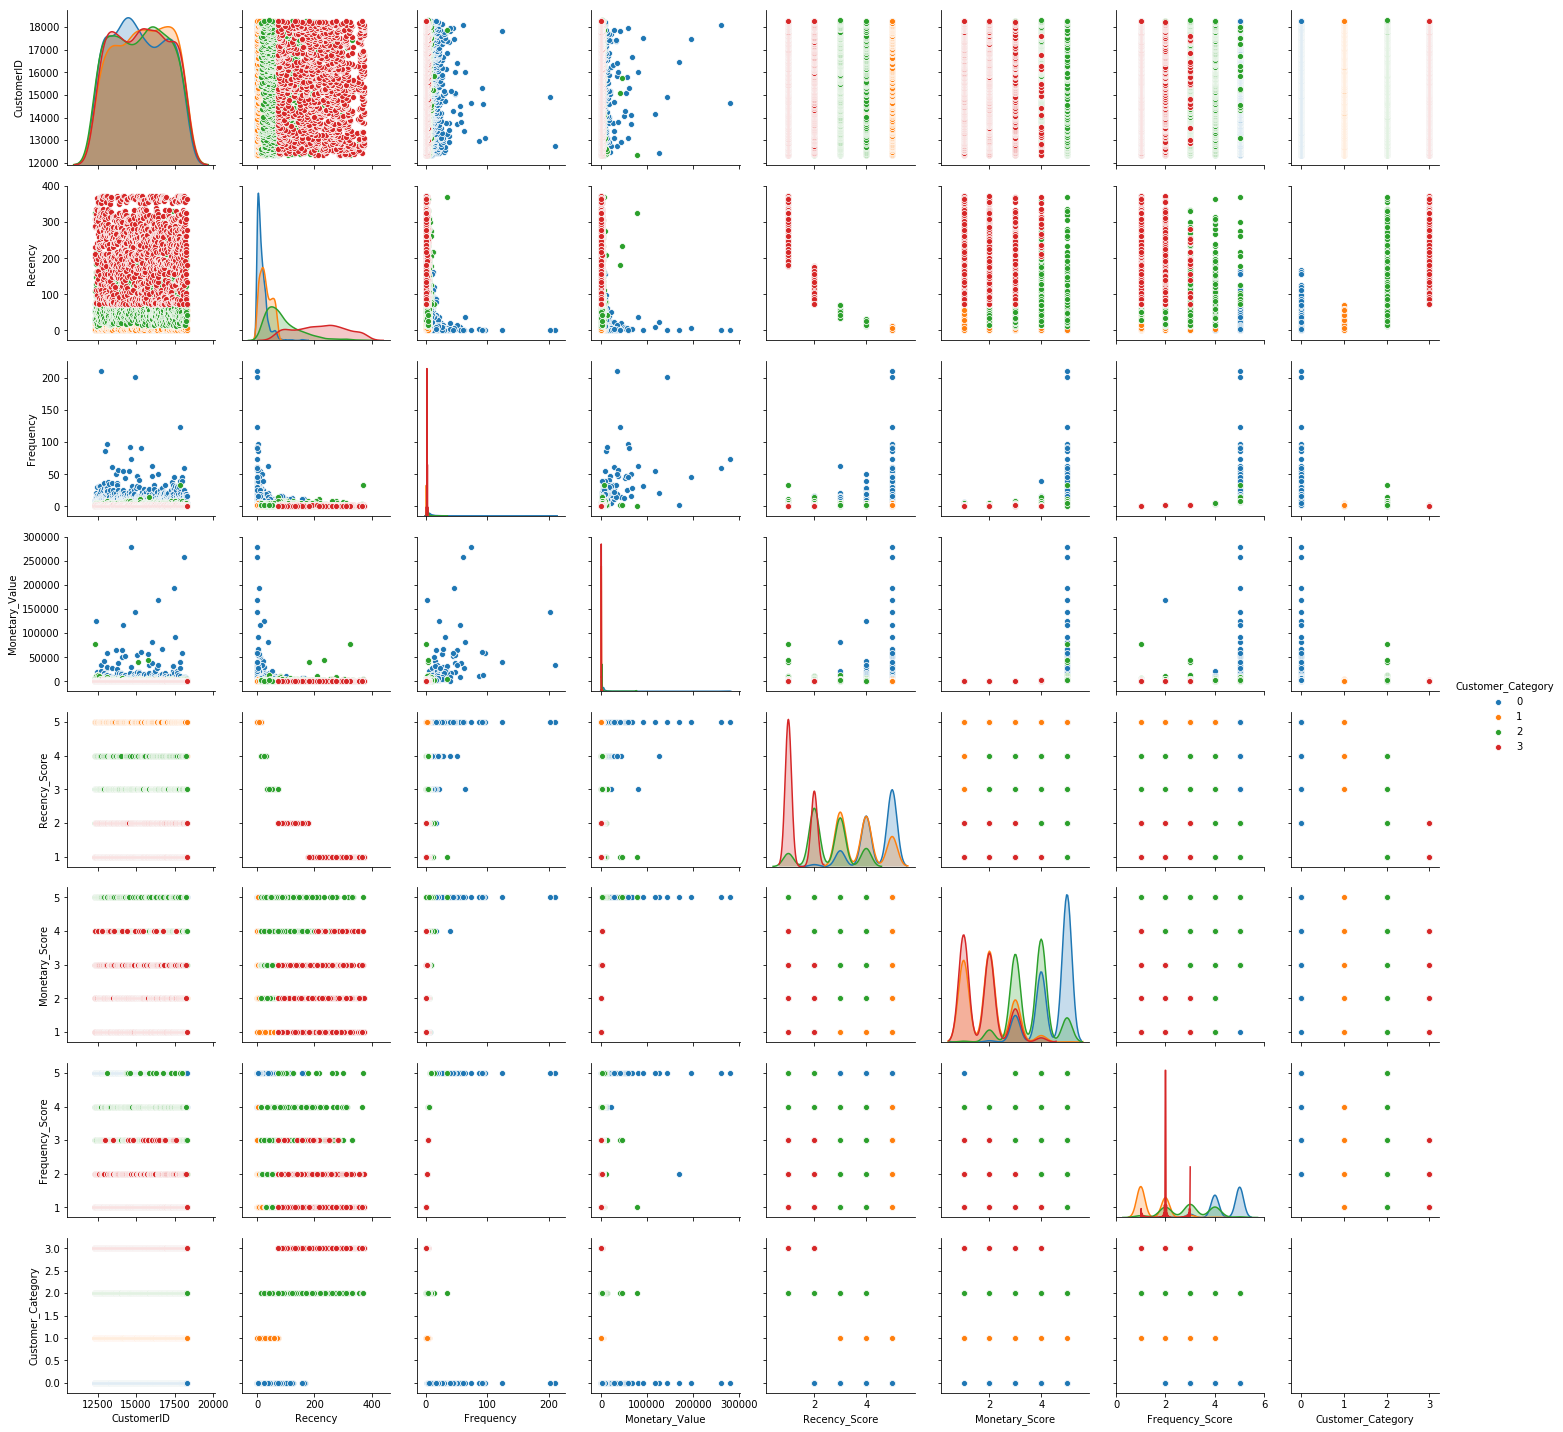

In [47]:
sns.pairplot(data=df, hue='Customer_Category')

# 7. Validation

In [48]:
#Calculating the Silhoutte Score to check the compactness of the clusters
silhouette_score(X,model.predict(X))

0.39774432188978165

Silhouette refers to a method of interpretation and validation of consistency within clusters of data, whose value is ranging in between -1 to +1. The technique provides a representation of how well each object has been classified. In our case, the value is approx 0.4 which is on a positive side. Thus, high value indicates that the object is well matched to its own cluster.

In [49]:
for k in range(2,100):
    model=KMeans(n_clusters=k,random_state=22)
    model.fit(X)
    print(k,silhouette_score(X,model.predict(X)))

2 0.4762871243988045
3 0.407414701551776
4 0.39774432188978165
5 0.37623766895284216
6 0.3966780709818615
7 0.40872598021768125
8 0.39150535697323086
9 0.39369892705966975
10 0.390350939512943
11 0.38420430947633316
12 0.38782252844295134
13 0.40899594015959756
14 0.41557043524440035
15 0.4116215494879379
16 0.40948611660882894
17 0.4454140752164717
18 0.4509339746607535
19 0.46108148986783365
20 0.45221282263724843
21 0.4829384277499234
22 0.5029214994756279
23 0.5185551419893822
24 0.5313711531345515
25 0.5388623008315686
26 0.5467857829977278
27 0.5429907868288761
28 0.5396863388496979
29 0.564240861629391
30 0.5825718997775157
31 0.5836956987926434
32 0.5984996410333077
33 0.6242655665755792
34 0.6322560063728816
35 0.6491157454167479
36 0.6572087464546397
37 0.655506043497582
38 0.6730532692921997
39 0.6835894250048363
40 0.6825932391133286
41 0.7071795322009639
42 0.7210636555424608
43 0.728973669023269
44 0.7340377569490769
45 0.754676837882645
46 0.7563845976016353
47 0.7631136

With increase in the number of clusters formed the silhoutte score is impacted directly on a positive trend, but by increasing the number of clusters will also increasing the complexity of the categories formed. Clearly, our cluster formation is an optimized solution of understanding the customer category and having a good silhoutte score.